# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
#Importing the tensorflow library
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
#Checking the shape of X_train and X_test before reshaping 
print('The shape of X_train is: ',X_train.shape)
#As we can see the shape of X_train is:  (60000, 28, 28)

print('The shape of X_test is: ', X_test.shape)
#As we can see the shape of X_test is:  (10000, 28, 28)

The shape of X_train is:  (60000, 28, 28)
The shape of X_test is:  (10000, 28, 28)


In [4]:
#Let's see X_train
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [5]:
#Let's see X_test
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
# Preprocess the data
#First, reshapeing the data and normalize it to be in the right shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)/255.0  #X_train reshape and normalization

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)/255.0  #X_test reshape and normalization


In [7]:
#Let's check X_train and X_test after reshaping 
print('The shape of X_train is: ',X_train.shape)
#As we can see the shape of X_train is:  (60000, 28, 28, 1)

print('The shape of X_test is: ', X_test.shape)
#As we can see the shape of X_test is:  (10000, 28, 28, 1)

The shape of X_train is:  (60000, 28, 28, 1)
The shape of X_test is:  (10000, 28, 28, 1)


In [8]:
#Let's see X_train after normalizing it
X_train
#We can notice the difference now

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
#Let's see X_test after normalizing it
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [10]:
#Changing the X_train to np array
X_train = np.array(X_train)

#Changing the X_test to np array
X_test = np.array(X_test)

### Now, let's turn labels into categories using the to_categorical function

In [11]:
#Before we do so, let's first see y_train
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
#Before we do so, let's first see y_test
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [14]:
#Turning the y_train to categorical
y_train = to_categorical(y_train, num_classes=10)


#Turning the y_test to categorical
y_test = to_categorical(y_test, num_classes=10)

In [15]:
#Now, let's first see y_train after turning it to categorical
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
#Now, let's first see y_test after turning it to categorical
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [18]:
#Importing matplotlib for visualization
import matplotlib.pyplot as plt
#Importing Sequential from keras
from keras.models import Sequential
#Importing Conv2D, MaxPooling2D, Flatten, Dense from keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Build the CNN model
model = Sequential()
#Creating a Conv2D layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
#Creating a Conv2D layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#Creating a Conv2D layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



#Seeing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [20]:
# Compile the model

#In the loss, I am going to use 'sparse_categorical_crossentropy' because it is a categorical model
model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model

#Fitting the model with the train dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, validation_data=(X_test, y_test))
#validation_split=0.2

Epoch 1/10
469/469 [==============================] - 19s 38ms/step - loss: 0.3085 - accuracy: 0.9084 - val_loss: 0.0999 - val_accuracy: 0.9695
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0868 - accuracy: 0.9738 - val_loss: 0.0836 - val_accuracy: 0.9738
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0626 - accuracy: 0.9805 - val_loss: 0.0521 - val_accuracy: 0.9844
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0509 - val_accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0486 - val_accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0480 - val_accuracy: 0.9865
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0431 - val_accuracy:

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 2s 7ms/step - loss: 0.0515 - accuracy: 0.9850
Test Accuracy: 0.9850000143051147


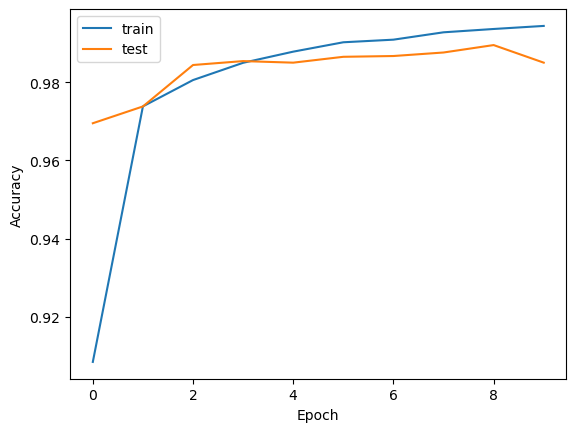

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='train')

plt.plot(history.history['val_accuracy'], label='test')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
